In [89]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [90]:
# Importing Dataset
df = pd.read_csv('E:\\download\\gas_turbines.csv')
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [92]:
df.shape

(15039, 11)

In [93]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [94]:
df[df.duplicated()].shape

(0, 11)

In [95]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [96]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [97]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [98]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

<AxesSubplot:>

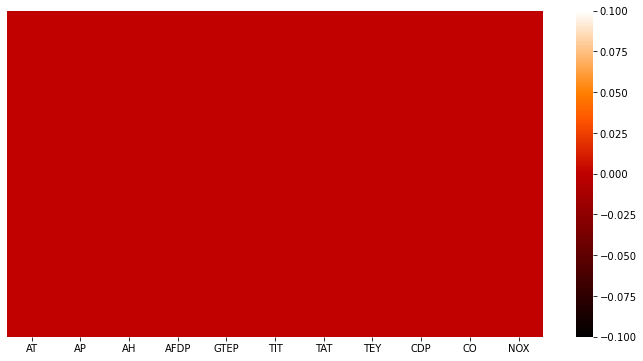

In [99]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

# Data Visualisation

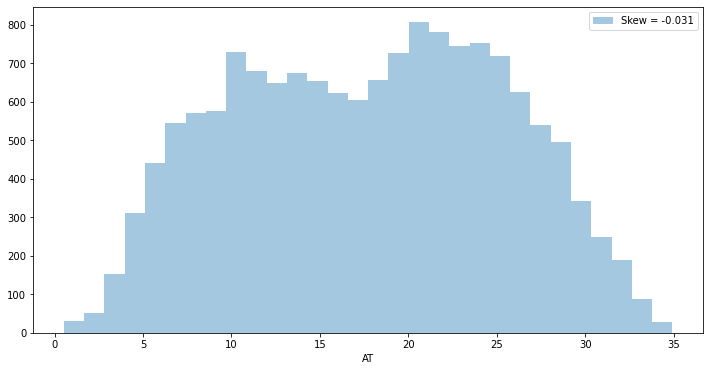

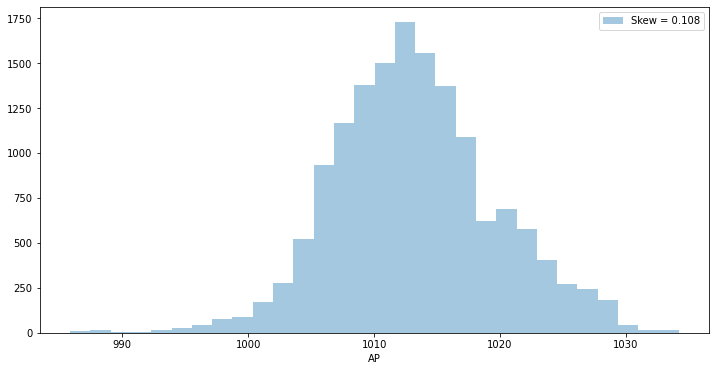

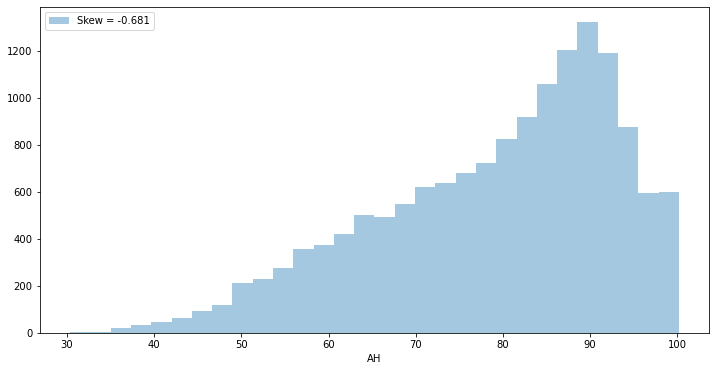

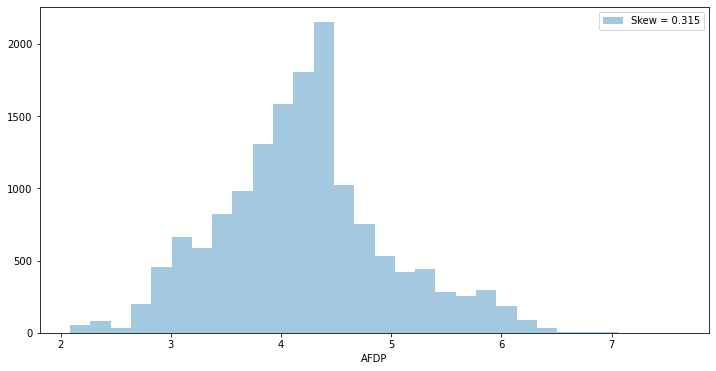

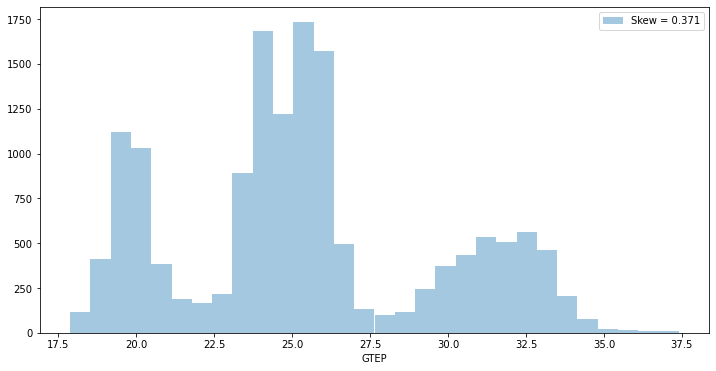

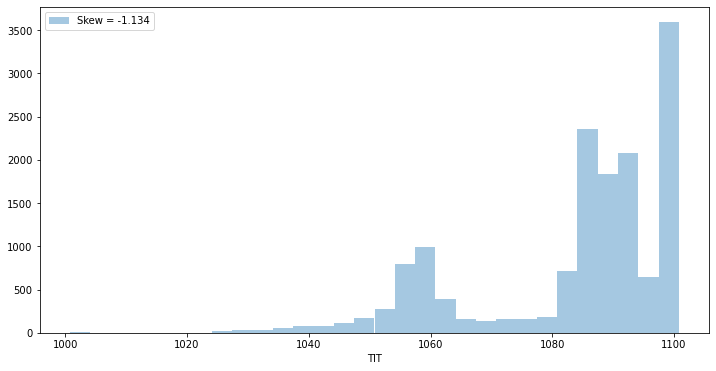

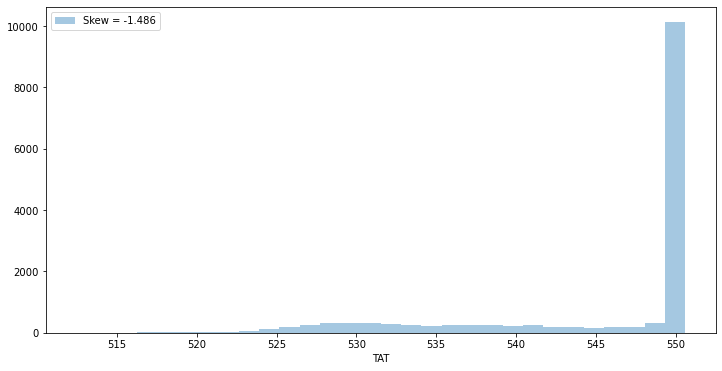

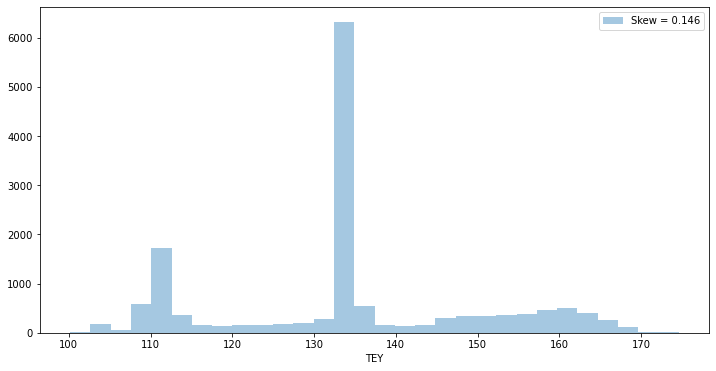

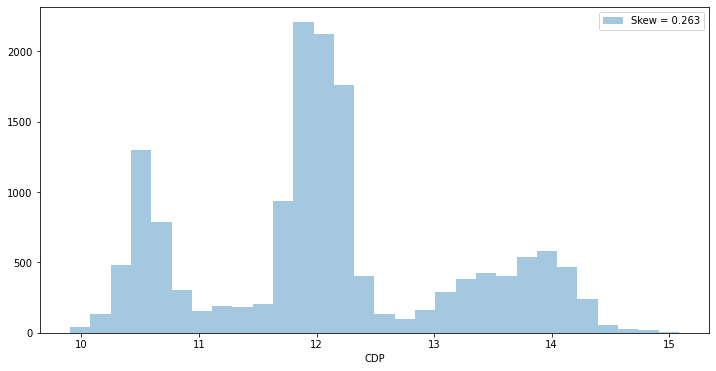

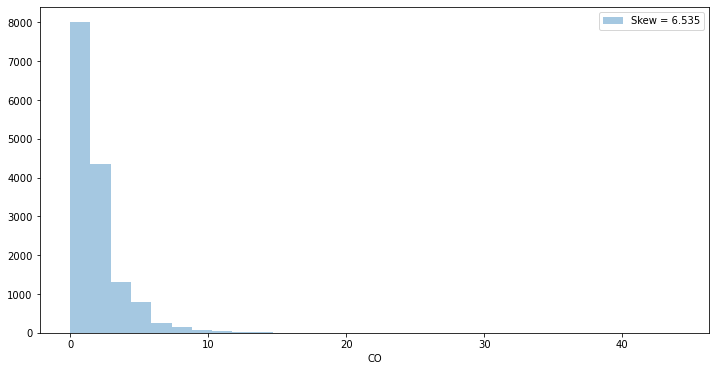

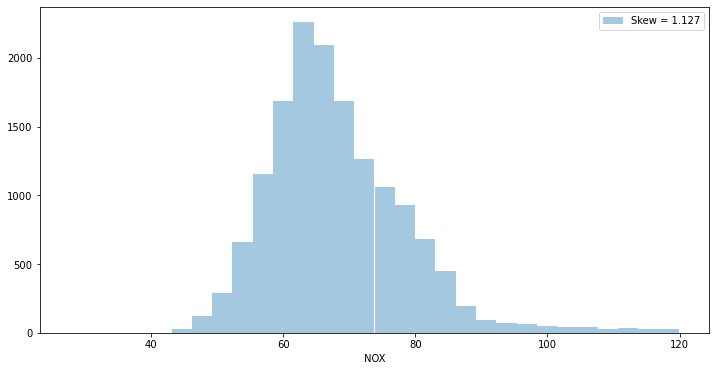

In [100]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

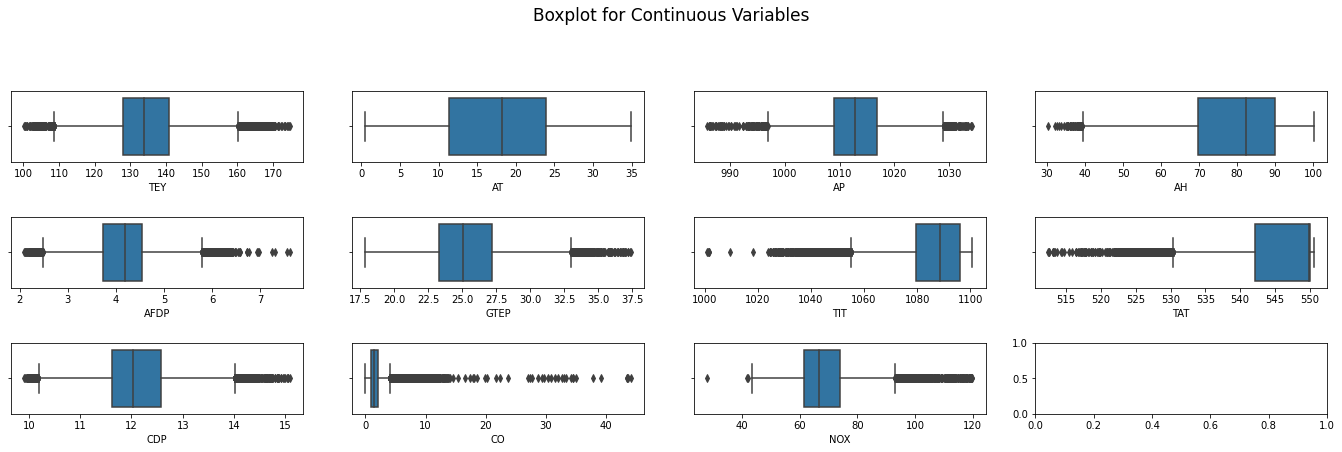

In [101]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

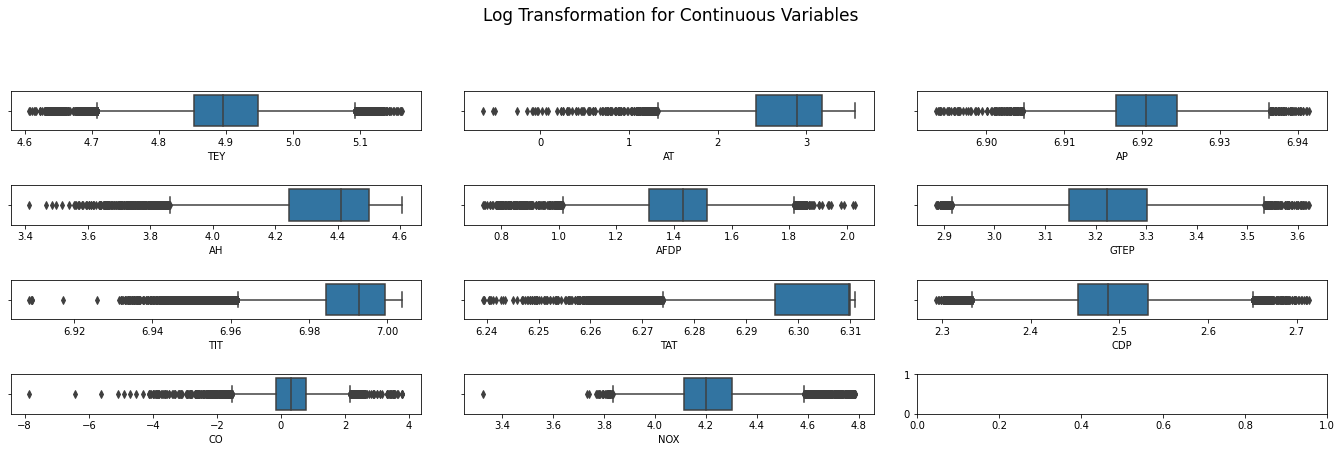

In [102]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

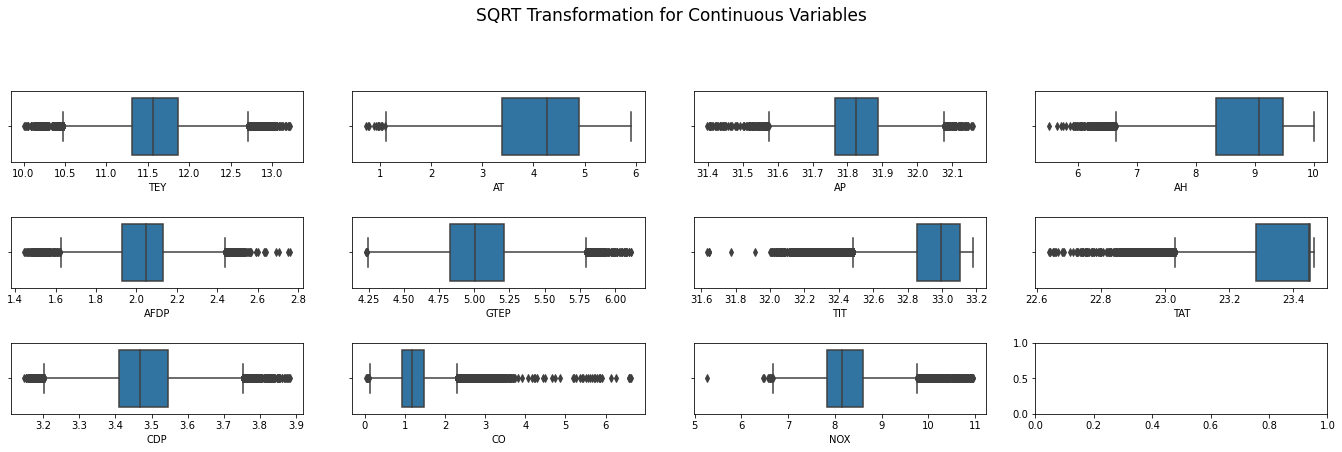

In [103]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

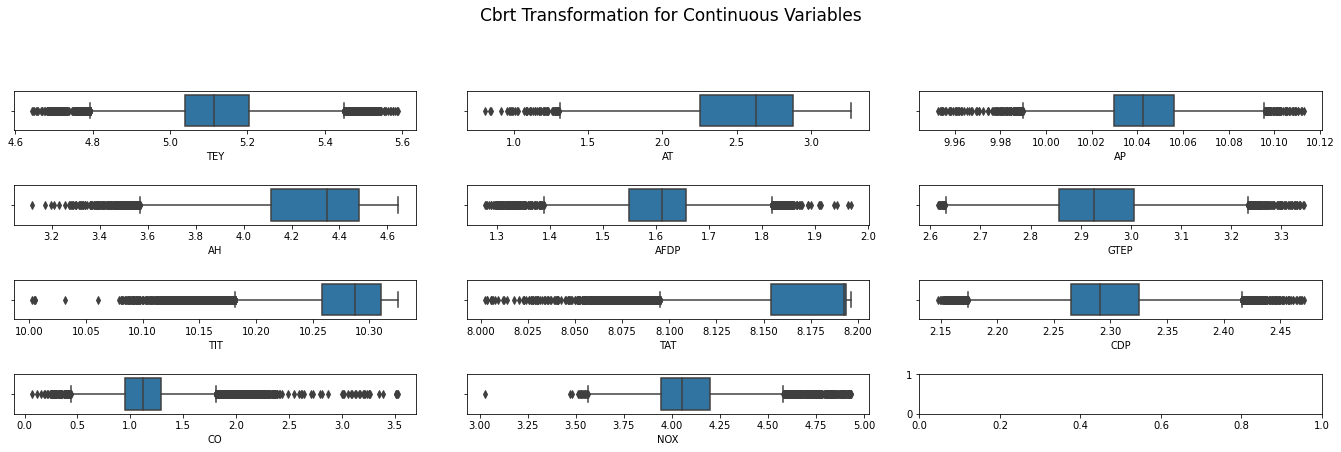

In [104]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

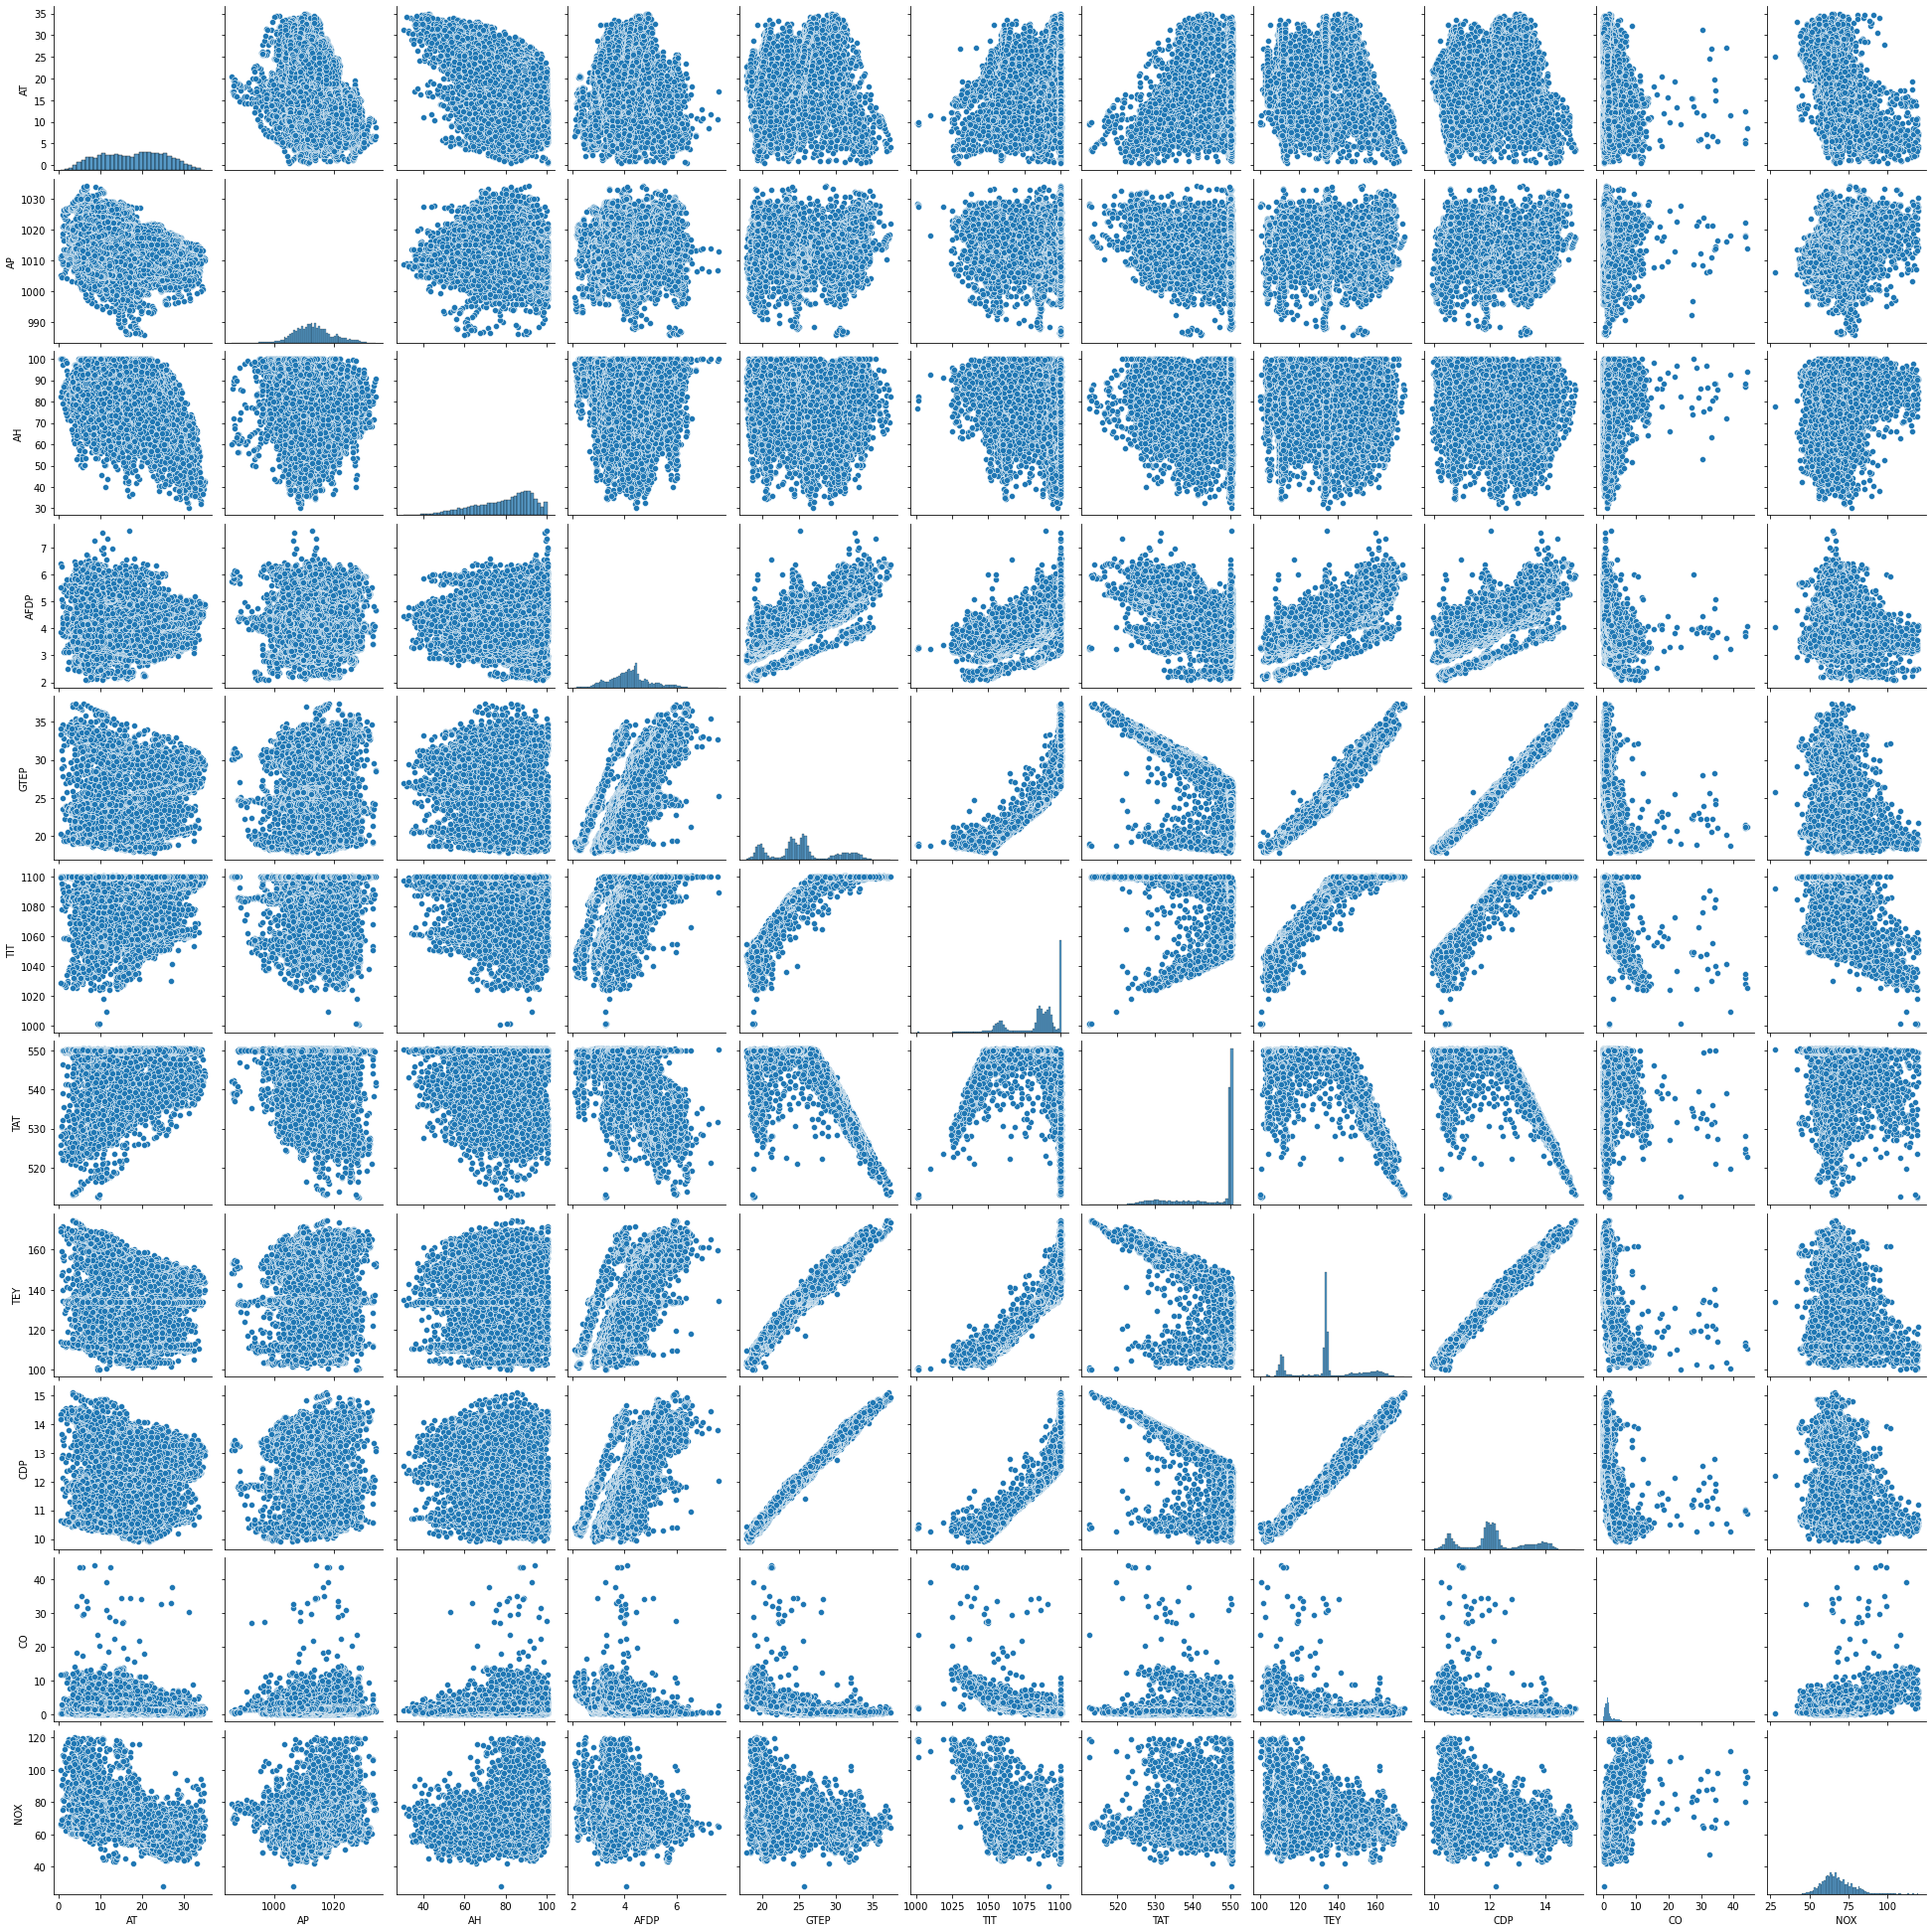

In [105]:
# Dependency of Target variable on diff Features
sns.pairplot(df)    

In [107]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

TEY
TEY   1.000000
CDP   0.988473
GTEP  0.977042
TIT   0.891587
AFDP  0.717995
AP    0.146939
NOX  -0.102631
AH   -0.110272
AT   -0.207495
CO   -0.541751
TAT  -0.720356

<AxesSubplot:title={'center':'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

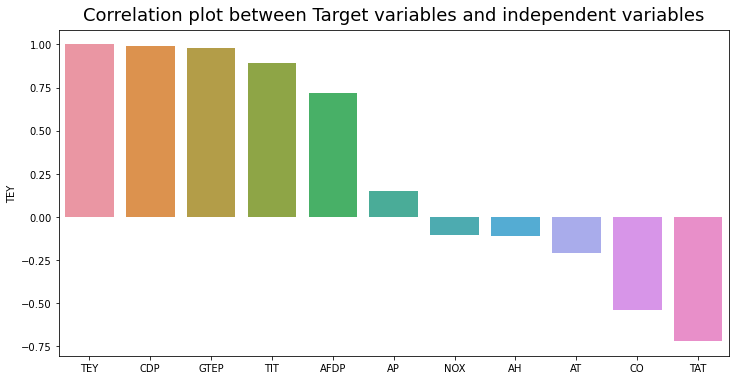

In [108]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

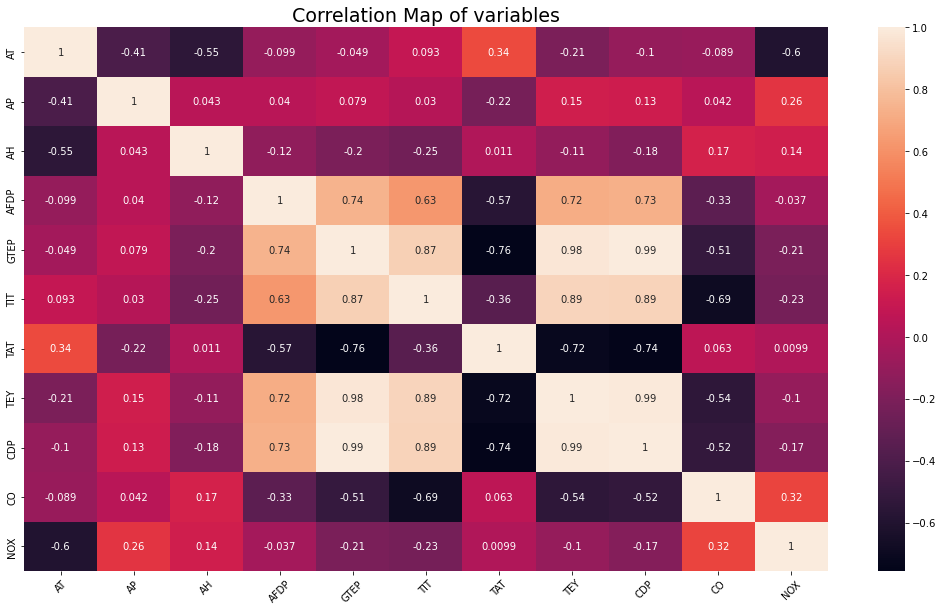

In [109]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [30]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=6237d918a56456517bd88b48f86e5f203ad7050ff298195215241530fe389b15
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\d8\2d\fc\c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


In [110]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

x    y   ppscore            case  is_valid_score               metric  \
84    TEY  TEY  1.000000  predict_itself            True                 None   
95    CDP  TEY  0.872285      regression            True  mean absolute error   
51   GTEP  TEY  0.832336      regression            True  mean absolute error   
62    TIT  TEY  0.766040      regression            True  mean absolute error   
73    TAT  TEY  0.226050      regression            True  mean absolute error   
40   AFDP  TEY  0.152509      regression            True  mean absolute error   
106    CO  TEY  0.055869      regression            True  mean absolute error   
7      AT  TEY  0.000000      regression            True  mean absolute error   
18     AP  TEY  0.000000      regression            True  mean absolute error   
29     AH  TEY  0.000000      regression            True  mean absolute error   
117   NOX  TEY  0.000000      regression            True  mean absolute error   

     baseline_score  model_score                    model  
84         0.000000     1.000000                     None  
95        11.172076     1.426840  DecisionTreeRegressor()  
51        11.172076     1.873154  DecisionTreeRegressor()  
62        11.172076     2.613821  DecisionTreeRegressor()  
73        11.172076     8.646631  DecisionTreeRegressor()  
40        11.172076     9.468234  DecisionTreeRegressor()  
106       11.172076    10.547906  DecisionTreeRegressor()  
7         11.172076    16.007470  DecisionTreeRegressor()  
18        11.172076    12.475617  DecisionTreeRegressor()  
29        11.172076    16.950976  DecisionTreeRegressor()  
117       11.172076    14.537337  DecisionTreeRegressor()

Text(0.5, 1.01, 'PPScore of each feature with Target variable')

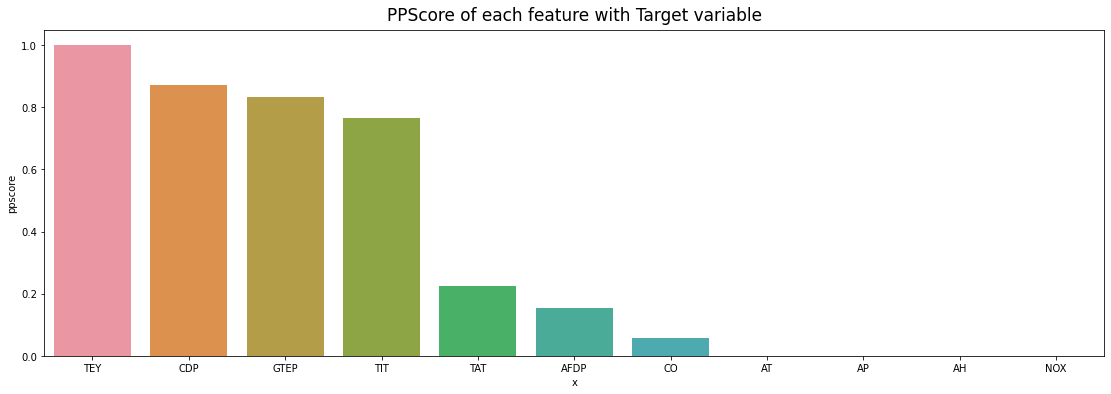

In [111]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

In [112]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]

In [113]:
outliers

AT       AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
261     5.66020  1018.30  86.968  3.8404  21.079  1028.5  523.86  112.02   
553     3.55320  1027.30  90.871  4.2162  21.464  1041.2  531.68  117.76   
763     1.81300  1007.20  74.980  3.6967  19.958  1026.4  528.18  111.72   
764     1.49880  1006.30  76.734  3.7063  20.041  1027.6  528.79  112.28   
765     0.97877  1005.70  78.978  3.7379  20.084  1027.9  528.52  112.71   
993     4.36570  1021.60  85.528  3.9574  20.263  1025.6  525.72  111.35   
6896   17.13200  1010.80  80.503  2.2148  18.484  1034.1  539.98  102.07   
7019    7.02760   997.23  97.761  2.0992  19.227  1037.2  538.53  109.63   
7470    7.04730  1019.60  96.885  2.4558  19.501  1032.0  532.32  109.21   
9920   15.17900  1017.60  71.630  2.7816  18.435  1027.8  533.45  103.64   
13820  14.18300  1023.10  78.110  3.1557  18.869  1025.0  530.16  103.80   
13921  11.58500  1018.20  92.751  3.2518  18.784  1009.5  519.71  100.83   
14100   9.40970  1027.90  82.224  3.3003  18.987  1001.4  512.60  100.32   
14278   9.90780  1026.10  65.923  3.3126  19.366  1024.5  527.21  108.08   
14317   3.93850  1021.30  90.536  3.4765  20.031  1026.6  526.30  111.70   
14320   3.49070  1020.80  91.519  3.5309  20.098  1025.8  525.35  111.91   

          CDP       CO      NOX  anamoly  
261    10.963  43.4280   99.237       -1  
553    10.984   8.8254  106.840       -1  
763    10.553  12.0900  114.940       -1  
764    10.585  11.6520  112.830       -1  
765    10.628  11.6910  108.880       -1  
993    10.652  12.7860  112.270       -1  
6896   10.182  11.5150  110.760       -1  
7019   10.338  11.0440  105.060       -1  
7470   10.567  11.3740  112.230       -1  
9920   10.143  12.1440  113.800       -1  
13820  10.340  13.3130  116.340       -1  
13921  10.253  39.0500  111.780       -1  
14100  10.495  23.6290  107.890       -1  
14278  10.506  20.2710  105.660       -1  
14317  10.683  14.0350  114.700       -1  
14320  10.761  11.9210  113.900       -1

# Data Preprocessing

In [114]:
#drop the outliers
df = df.drop(outliers.index)
df.shape

(15023, 11)

In [115]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15018  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15019  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15020  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15021  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15022  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15018  4.5186  79.559  
15019  4.8470  79.917  
15020  7.9632  90.912  
15021  6.2494  93.227  
15022  4.9816  92.498  

[15023 rows x 11 columns]

In [116]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [117]:
df.shape

(15023, 7)

In [118]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)    

In [119]:
temp = df_std.sample(frac=1)          
temp_s = df_std.sample(frac=0.1)  

In [120]:
temp_s

AFDP      GTEP       TIT       TAT       TEY       CDP        CO
9951   0.416773  1.545375  0.982562 -1.686333  1.539331  1.618068 -0.507654
8628  -0.332290 -0.486659 -0.070617  0.571554 -0.018693 -0.331977 -0.217228
6980  -1.655885 -0.166884  0.148542  0.611054 -0.061690 -0.129716 -0.241649
6185   0.262511 -0.094971  0.264209  0.577925 -0.053470 -0.097971  0.169170
5751   0.255930  0.032076  0.379876  0.627618 -0.027545 -0.019970 -0.580651
...         ...       ...       ...       ...       ...       ...       ...
9317   0.232765 -0.430806 -0.003652  0.603409 -0.059793 -0.374605 -0.162002
12676 -1.226138 -1.219936 -1.379481  0.552440 -1.478075 -1.142832 -0.007275
14286 -1.168488 -1.440471 -2.250028 -0.441437 -1.377537 -1.313348  3.383675
15007 -0.539727 -0.938995 -0.880287  0.583021 -0.801498 -0.923339  0.791108
1041   2.139184  1.811455  0.982562 -2.054577  1.734084  1.692441 -0.628262

[1502 rows x 7 columns]

In [121]:
# Splitting data into target variable and independent variables
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

AFDP      GTEP       TIT       TAT       CDP        CO
9951   0.416773  1.545375  0.982562 -1.686333  1.618068 -0.507654
8628  -0.332290 -0.486659 -0.070617  0.571554 -0.331977 -0.217228
6980  -1.655885 -0.166884  0.148542  0.611054 -0.129716 -0.241649
6185   0.262511 -0.094971  0.264209  0.577925 -0.097971  0.169170
5751   0.255930  0.032076  0.379876  0.627618 -0.019970 -0.580651
...         ...       ...       ...       ...       ...       ...
9317   0.232765 -0.430806 -0.003652  0.603409 -0.374605 -0.162002
12676 -1.226138 -1.219936 -1.379481  0.552440 -1.142832 -0.007275
14286 -1.168488 -1.440471 -2.250028 -0.441437 -1.313348  3.383675
15007 -0.539727 -0.938995 -0.880287  0.583021 -0.923339  0.791108
1041   2.139184  1.811455  0.982562 -2.054577  1.692441 -0.628262

[1502 rows x 6 columns]

In [122]:
# Creating train and test data for model validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)  

In [123]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

# Model Building

In [124]:
# Importing Libraries
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')   

[]

In [125]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [126]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 5)                 35        
                                                                 
 dense_269 (Dense)           (None, 6)                 36        
                                                                 
 dense_270 (Dense)           (None, 10)                70        
                                                                 
 dense_271 (Dense)           (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [127]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [128]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model1:")
model2.summary()

Here is the summary of the model1:
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_272 (Dense)           (None, 32)                224       
                                                                 
 dense_273 (Dense)           (None, 32)                1056      
                                                                 
 dense_274 (Dense)           (None, 64)                2112      
                                                                 
 dense_275 (Dense)           (None, 128)               8320      
                                                                 
 dense_276 (Dense)           (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [129]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_272 (Dense)           (None, 32)                224       
                                                                 
 dense_273 (Dense)           (None, 32)                1056      
                                                                 
 dense_274 (Dense)           (None, 64)                2112      
                                                                 
 dense_275 (Dense)           (None, 128)               8320      
                                                                 
 dense_276 (Dense)           (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
CPU times: tot

In [130]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 163ms/step


array([[ 2.5732262e-02],
       [ 1.5865034e+00],
       [-1.4284240e+00],
       [-2.7749838e-02],
       [ 1.4253287e-02],
       [ 1.0531087e+00],
       [ 2.3997245e+00],
       [ 2.1015685e-03],
       [-2.9053042e-02],
       [ 7.3891710e-03]], dtype=float32)

In [131]:
print('Actual values')
y_test[:10]

Actual values


5928     0.049597
7538     1.461556
4904    -1.497677
5825    -0.045882
8291     0.010394
13034    1.020201
787      2.301270
5280     0.061611
6497    -0.147685
11426    0.035054
Name: TEY, dtype: float64

In [132]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

36/36 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0464 - mape: 144.0583

 Results for model 2: 
 Training Loss: 0.0039605312049388885 
 Training Mean Absolute Error: 0.0039605312049388885 
 Training Mean Squared Error: 0.04635179042816162


In [133]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

12/12 [==============================] - 0s 4ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0522 - mape: 248.0830

 Results for model 2: 
 Test Loss: 0.0048116776160895824 
 Test Mean Absolute Error: 0.0048116776160895824 
 Test Mean Squared Error: 0.052240144461393356


# Predicting values from Model using same dataset




In [134]:
# generating predictions for test data
y_predict_test = model1.predict(x_test) 
# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

12/12 [==============================] - 0s 3ms/step
(376, 8)


AFDP      GTEP       TIT       TAT       CDP        CO    Actual  \
5928   0.529442  0.132755  0.525982  0.565183  0.154174 -0.165171  0.049597   
7538  -0.403103  1.607460  0.976474 -1.713091  1.466599 -0.724049  1.461556   
4904  -0.926960 -1.299041 -1.531675  0.597038 -1.337837  0.753918 -1.497677   
5825   0.026776 -0.092094  0.270296  0.631441 -0.069854 -0.326936 -0.045882   
8291  -0.367434 -0.432484  0.118103  0.584296 -0.155112 -0.420238  0.010394   
13034  0.800715  1.338025  0.982562 -1.138426  1.234408 -0.587665  1.020201   
787    2.767417  2.856117  0.982562 -3.764557  2.510553 -0.622068  2.301270   
5280   0.265539  0.143303  0.568596  0.608505  0.157802 -0.282382  0.061611   
6497   0.059681 -0.361290  0.020699  0.593215 -0.221323 -0.126163 -0.147685   
11426 -0.375726  0.016975  0.446841  0.566457  0.051683 -0.516919  0.035054   

       Predicted  
5928   -0.000096  
7538   -0.000127  
4904   -0.000257  
5825   -0.000063  
8291   -0.000057  
13034  -0.000104  
787    -0.000346  
5280   -0.000092  
6497   -0.000067  
11426  -0.000053

# Visualizing the Relationship between the Actual and Predicted Values Model Validation

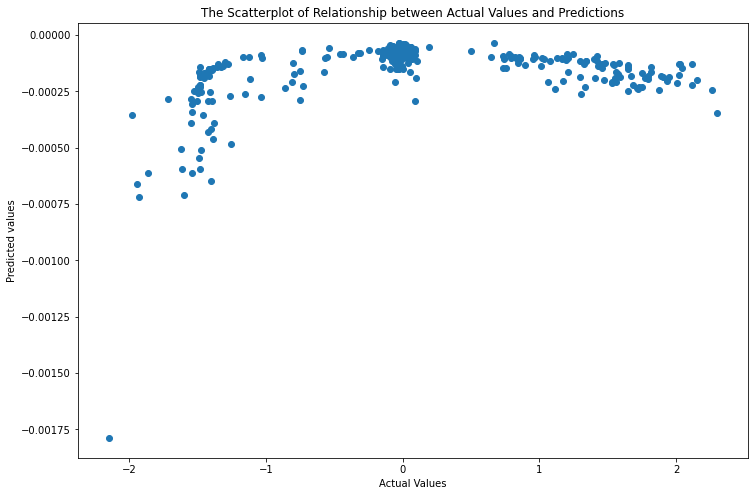

In [135]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [139]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [221]:
df = pd.read_csv('E:\\download\\forestfires (2).csv')
df.head(10)

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
5   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0  ...         0   
6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0  ...         0   
7   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0  ...         0   
8   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0  ...         0   
9   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0         0         0         0         0   
9         0         0         0         0         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  
5         0          small  
6         0          small  
7         0          small  
8         1          small  
9         1          small  

[10 rows x 31 columns]

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [223]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [224]:
df[df.duplicated()].shape

(8, 31)

In [225]:
df.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [226]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [227]:
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [228]:
data = df.drop_duplicates()

In [229]:
data[data.duplicated()].shape

(0, 31)

# Data Preprocessing

In [230]:
# List of Numerical Variables
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
data[numerical_features]

Number of numerical variables: 28


FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[509 rows x 28 columns]

In [231]:
# Discrete Variable
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


# Feature Engineering

In [232]:
# Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [233]:
# Categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [234]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(data[var].value_counts())

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64
small    371
large    138
Name: size_category, dtype: int64


In [235]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(data[var].value_counts()/np.float(len(data)))

aug    0.349705
sep    0.337917
mar    0.104126
jul    0.062868
feb    0.039293
jun    0.031434
oct    0.029470
apr    0.017682
dec    0.017682
jan    0.003929
may    0.003929
nov    0.001965
Name: month, dtype: float64
sun    0.184676
fri    0.163065
sat    0.161100
mon    0.145383
tue    0.123772
thu    0.117878
wed    0.104126
Name: day, dtype: float64
small    0.72888
large    0.27112
Name: size_category, dtype: float64


In [236]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [165]:
data.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262   
DMC       0.382925  1.000000  0.681446  0.309459  0.470875  0.062772   
DC        0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971   
ISI       0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955   
temp      0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503   
RH       -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000   
wind     -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721   
rain      0.052280  0.071017  0.033772  0.062132  0.067911  0.094343   
area      0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554   
dayfri    0.020889 -0.011152 -0.001642  0.051599 -0.077766  0.069599   
daymon   -0.057581 -0.105205 -0.053198 -0.159333 -0.135289  0.010311   
daysat   -0.021744 -0.003147 -0.029112 -0.037140  0.038863 -0.024118   
daysun   -0.088579  0.028050 -0.002249 -0.005213  0.015661  0.140341   
daythu    0.073127  0.079932  0.047835 -0.019173  0.051864 -0.128270   
daytue    0.007268 -0.002803  0.026066  0.062274  0.034738 -0.021152   
daywed    0.094854  0.021687  0.022670  0.125896  0.091309 -0.087122   
monthapr -0.116738 -0.198536 -0.270129 -0.106785 -0.156825  0.021627   
monthaug  0.225720  0.490160  0.270894  0.337101  0.349583  0.046842   
monthdec -0.136614 -0.177044 -0.106347 -0.162761 -0.329774 -0.047670   
monthfeb -0.281054 -0.319691 -0.402201 -0.250494 -0.319901  0.141593   
monthjan -0.455128 -0.106256 -0.115871 -0.103846 -0.146547  0.171900   
monthjul  0.033137  0.000617 -0.101518  0.020932  0.143987  0.013808   
monthjun -0.041972 -0.047759 -0.178719  0.119765  0.052779  0.014425   
monthmar -0.074706 -0.404974 -0.648890 -0.143589 -0.342129 -0.083581   
monthmay -0.036983 -0.082312 -0.115010 -0.060655 -0.045372  0.087384   
monthnov -0.088879 -0.074642 -0.078927 -0.076748 -0.053720 -0.035967   
monthoct -0.005172 -0.188126  0.094091 -0.071401 -0.052918 -0.072335   
monthsep  0.080444  0.119779  0.538299 -0.069600  0.091428 -0.061631   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.030409  0.052280  0.040998  0.020889  ... -0.136614 -0.281054   
DMC      -0.104563  0.071017  0.076932 -0.011152  ... -0.177044 -0.319691   
DC       -0.202856  0.033772  0.051542 -0.001642  ... -0.106347 -0.402201   
ISI       0.104834  0.062132  0.008429  0.051599  ... -0.162761 -0.250494   
temp     -0.227754  0.067911  0.099173 -0.077766  ... -0.329774 -0.319901   
RH        0.070721  0.094343 -0.074554  0.069599  ... -0.047670  0.141593   
wind      1.000000  0.059332  0.012623  0.121056  ...  0.270919 -0.028820   
rain      0.059332  1.000000 -0.006511 -0.001723  ... -0.009262 -0.013961   
area      0.012623 -0.006511  1.000000 -0.052390  ...  0.000706 -0.021205   
dayfri    0.121056 -0.001723 -0.052390  1.000000  ... -0.018868  0.047592   
daymon   -0.062712 -0.028473 -0.022178 -0.182056  ...  0.113829  0.002649   
daysat   -0.068421 -0.030252  0.087647 -0.193432  ... -0.058793  0.021400   
daysun    0.025971 -0.015749 -0.020657 -0.210075  ... -0.025435  0.007987   
daythu   -0.055820 -0.025236  0.020685 -0.161357  ... -0.002816 -0.042571   
daytue    0.052331  0.127243 -0.001002 -0.165896  ... -0.005158 -0.014599   
daywed   -0.022181 -0.019189 -0.011046 -0.150484  ...  0.003068 -0.035839   
monthapr  0.048864 -0.009262 -0.008589 -0.018868  ... -0.018000 -0.027133   
monthaug  0.027413  0.088572 -0.000948 -0.100652  ... -0.098386 -0.148305   
monthdec  0.270919 -0.009262  0.000706 -0.018868  ...  1.000000 -0.027133   
monthfeb -0.028820 -0.013961 -0.021205  0.047592  ... -0.027133  1.000000   
monthjan -0.070217 -0.004336 -0.012737 -0.027723  ... -0.008427 -0.012702   
monthjul -0.039880 -0.012411  0.005566 -0.048598  ... -0.034750 -0.052381   
monthjun  0.010124 -0.012437 -0.019083 -0.018562  ... -0.024170 -0.036433   
monthmar  0.181610 -0.019189 -0.048394  0.041050  ... -0.045740 -0.068947   


# Data Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

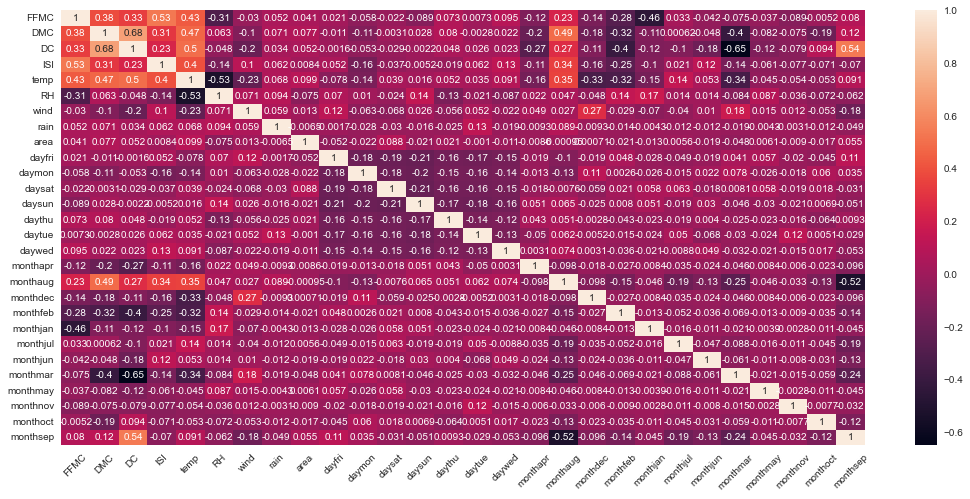

In [166]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

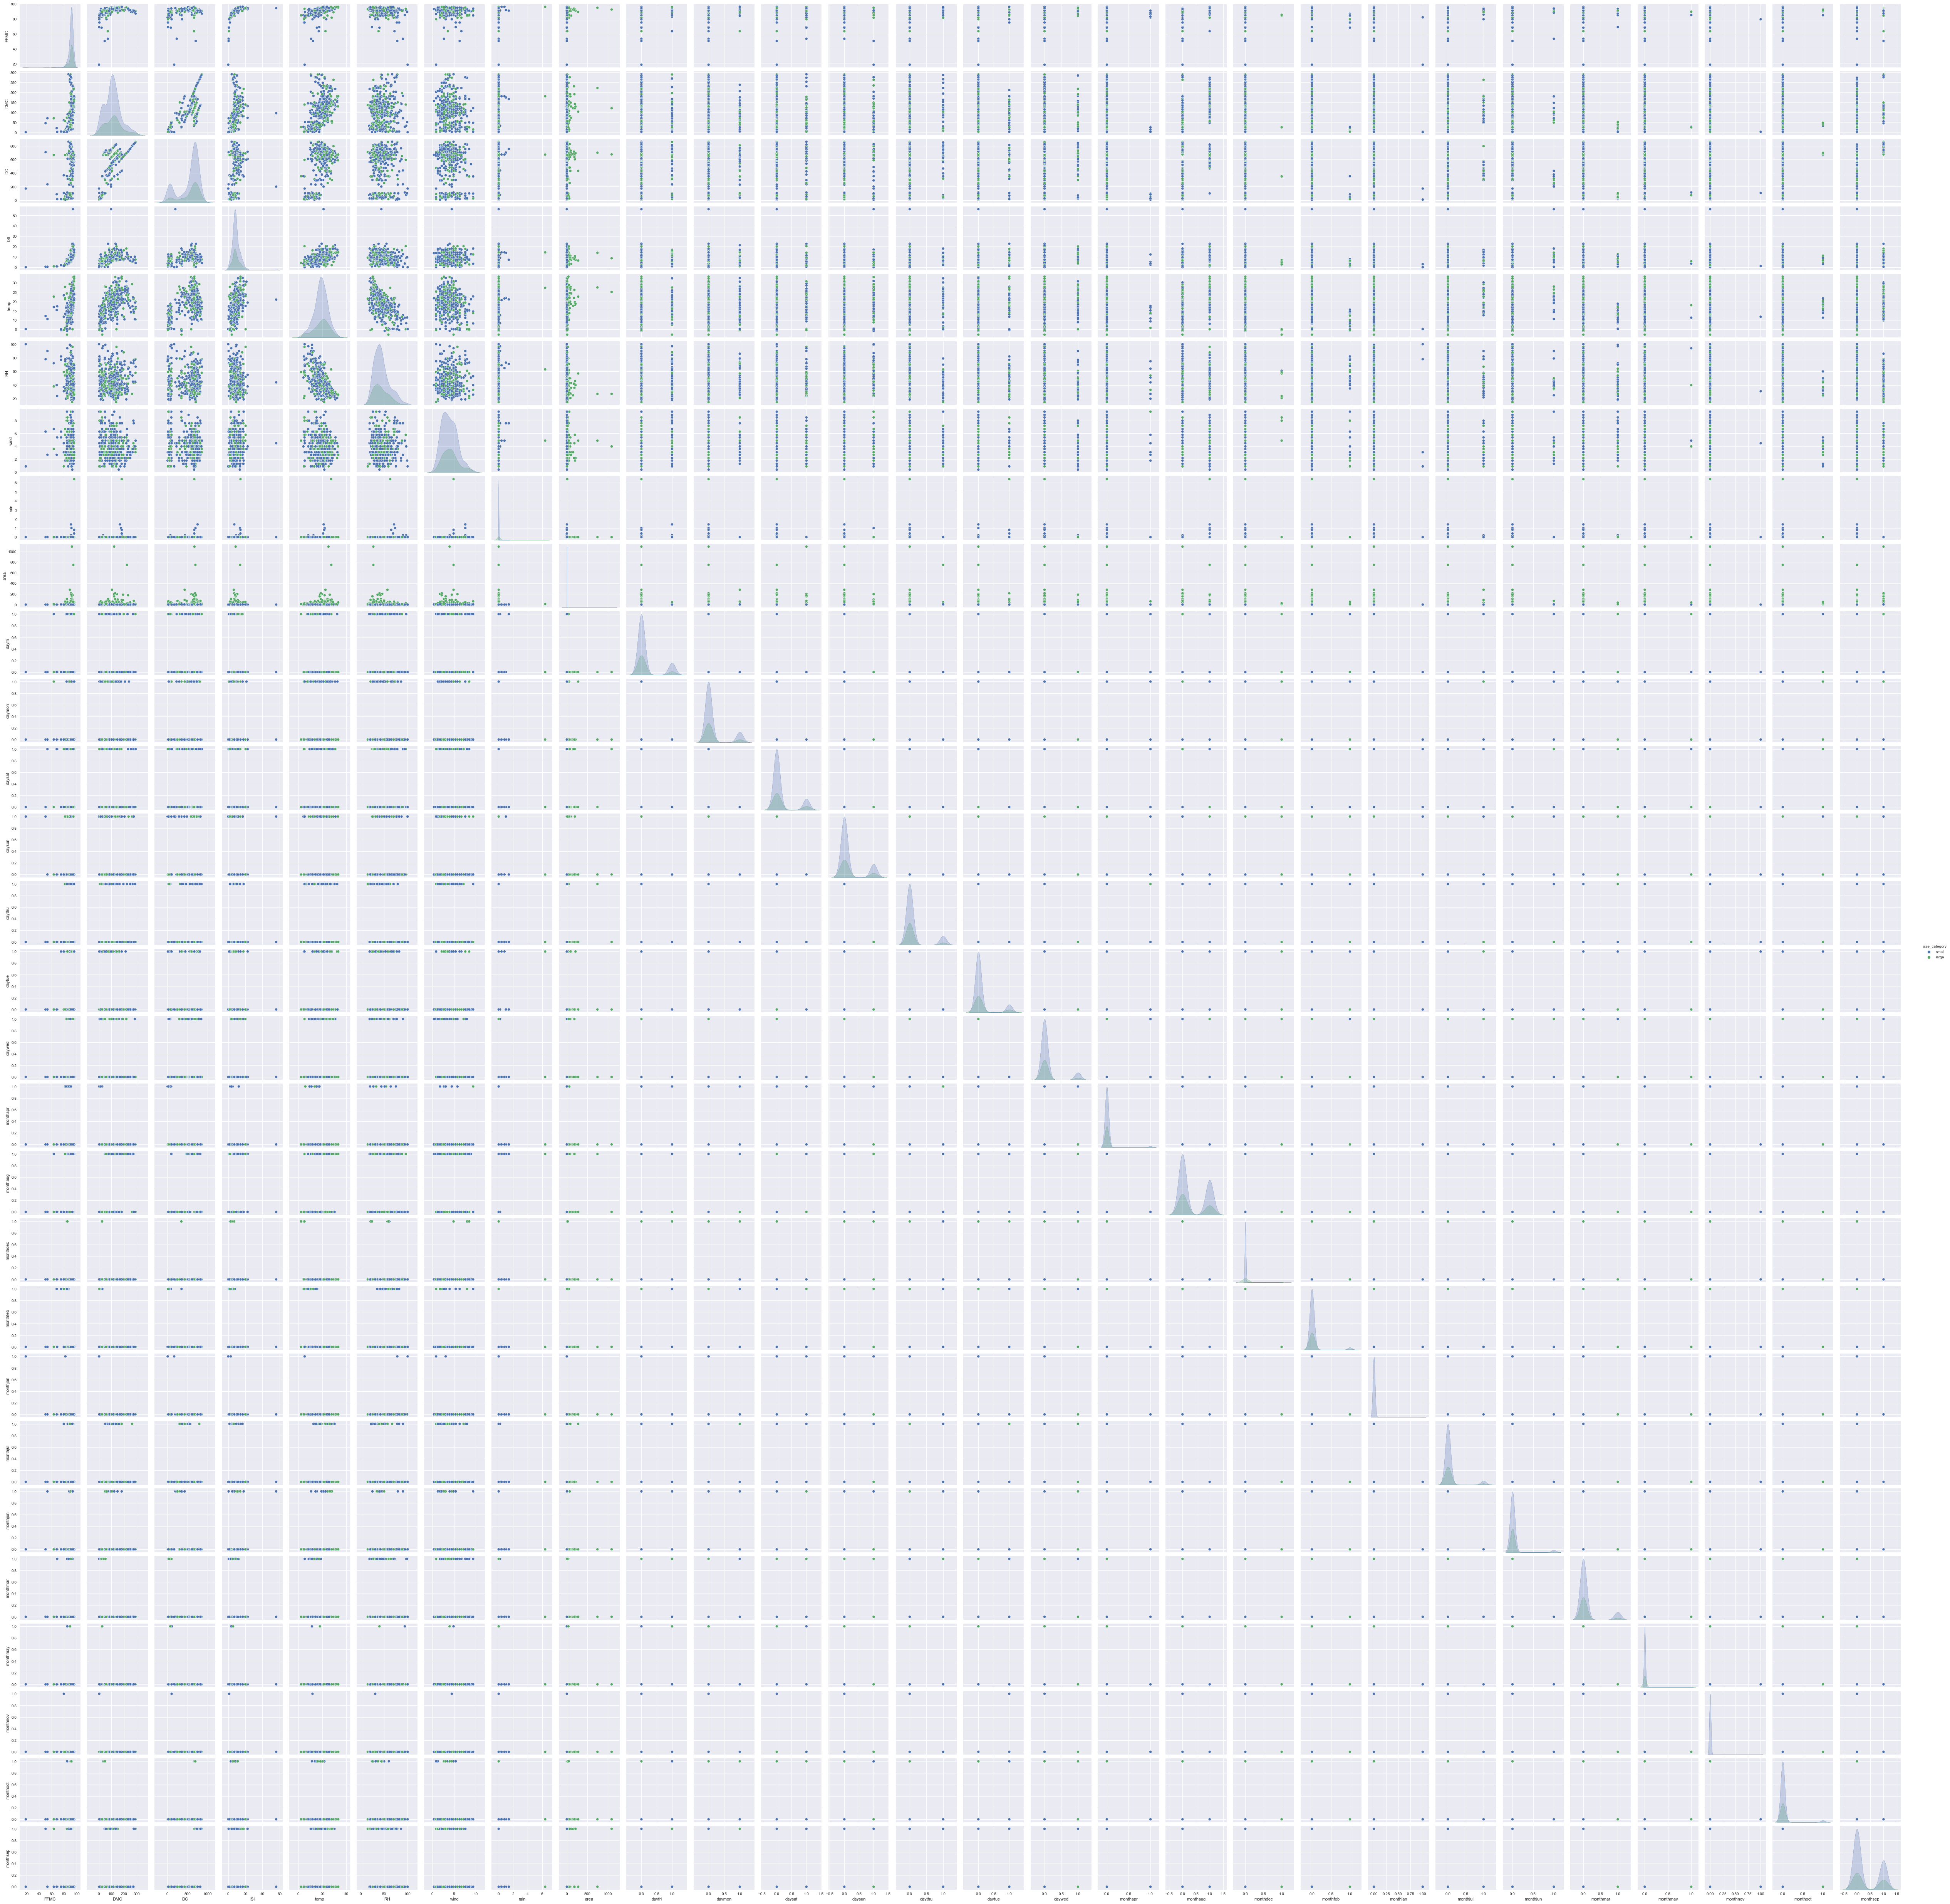

In [167]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='size_category')
plt.show()

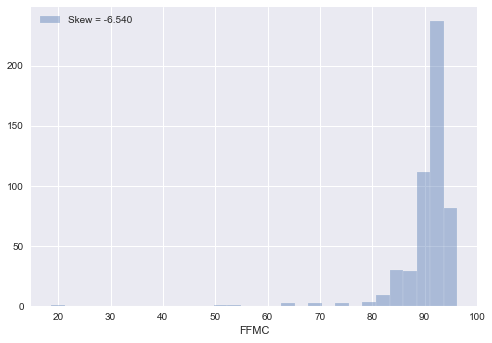

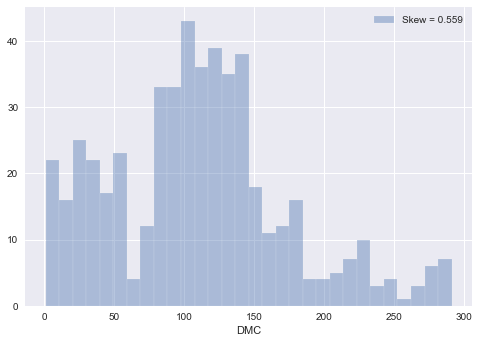

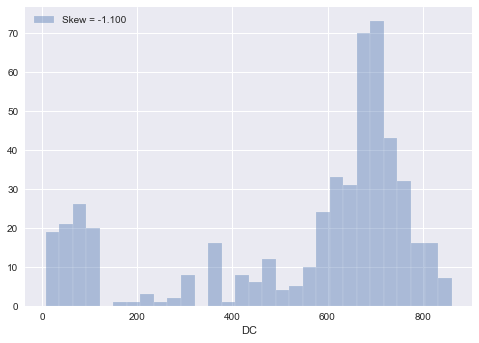

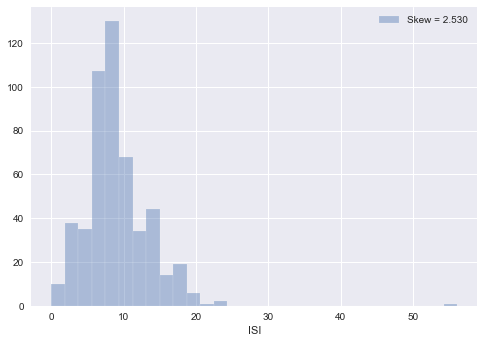

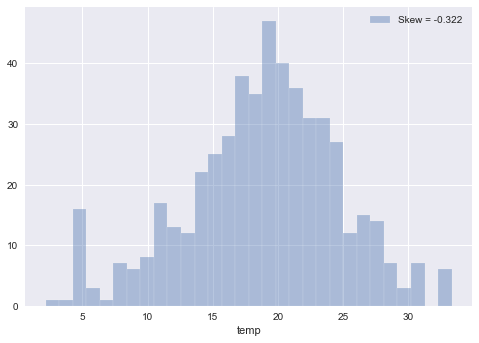

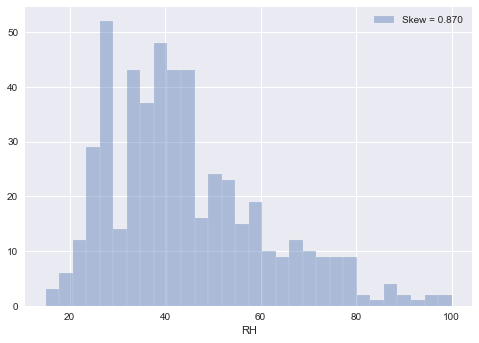

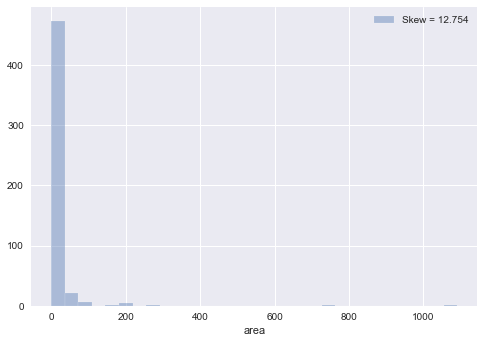

In [168]:
for feat in continuous_feature:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [170]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[continuous_feature]))))

The dataset contains 2 observations with more than 2 outliers


In [237]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

# Outliers Detection

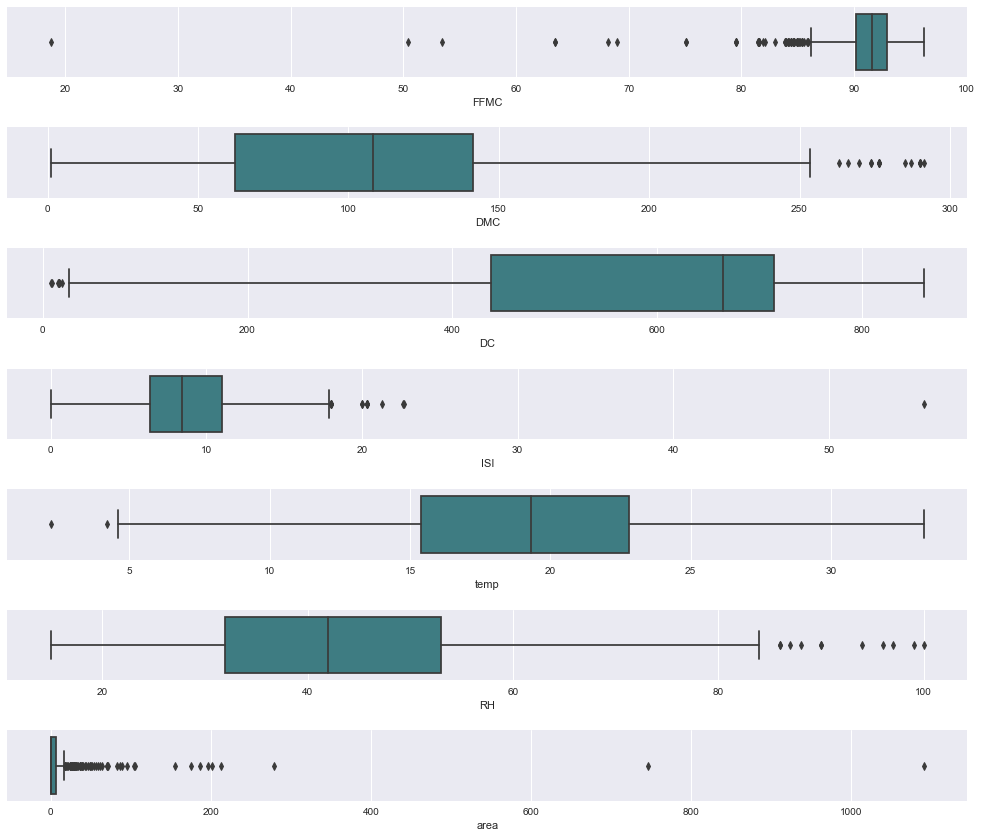

In [173]:
ot=data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

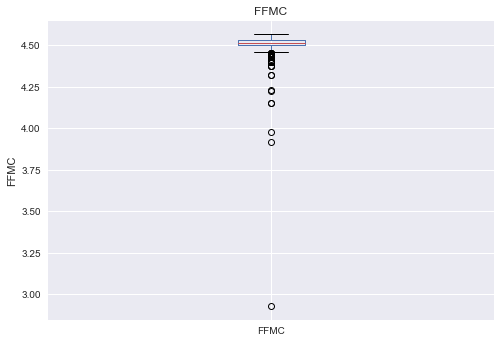

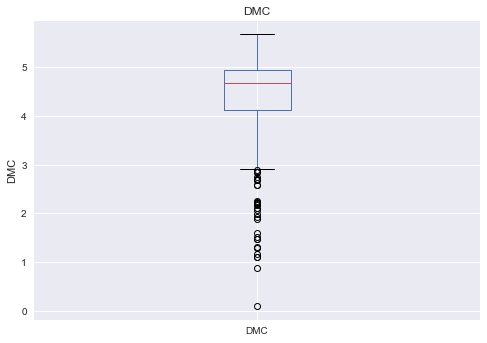

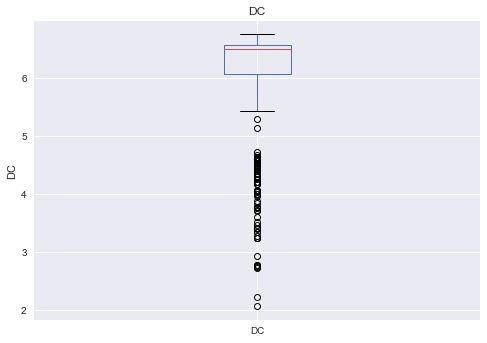

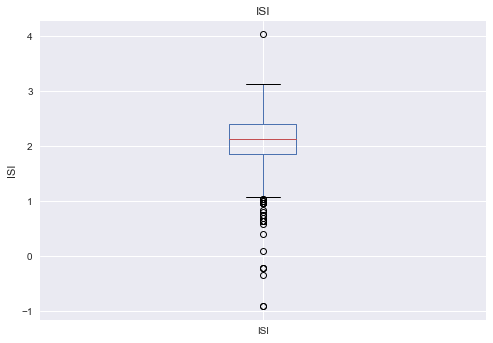

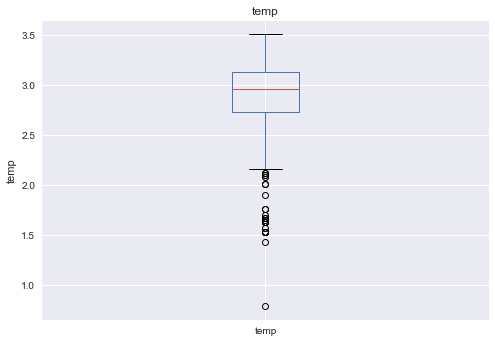

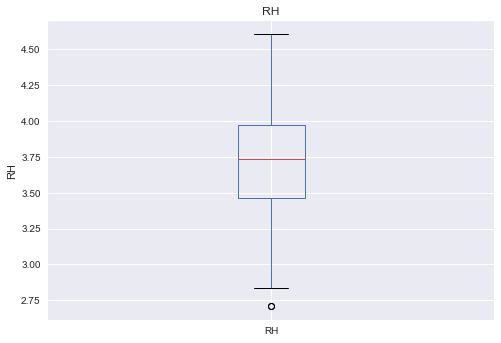

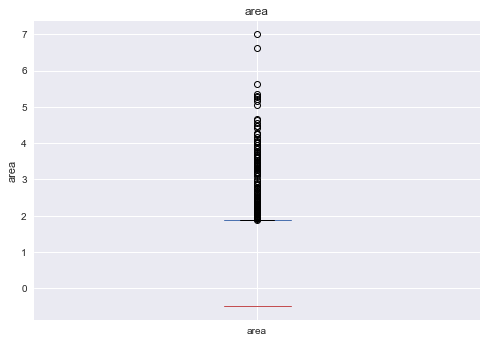

In [174]:
for feature in continuous_feature:
    data=data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: nan
Kurtosis: nan


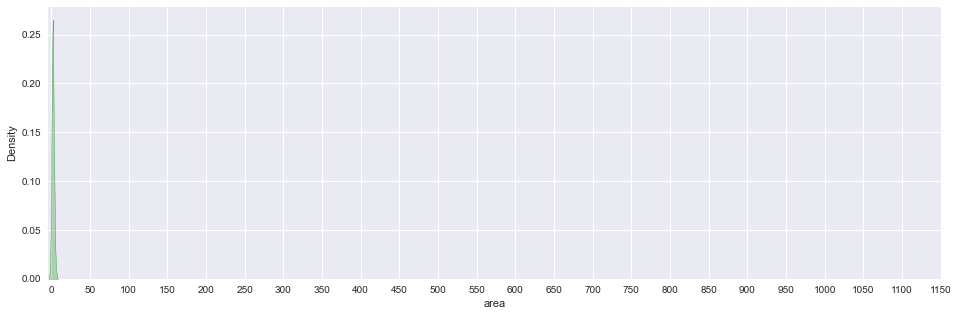

In [175]:
# Visualize the distribution of 'Area' and taking insights
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

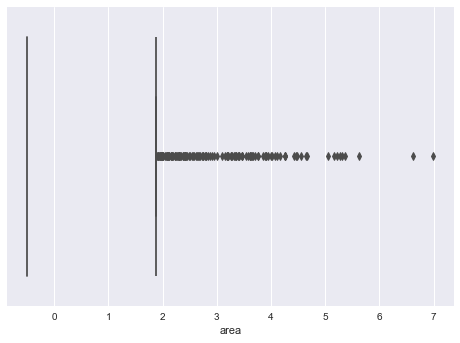

In [176]:
ax = sns.boxplot(data['area'])

In [238]:
# Categorical Variables
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


month  day size_category
0   mar  fri         small
1   oct  tue         small
2   oct  sat         small
3   mar  fri         small
4   mar  sun         small

In [239]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [240]:
# Decide which categorical variables you want to use in model
for feature in data.columns:
    if data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    371
large    138
Name: size_category, dtype: int64



[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

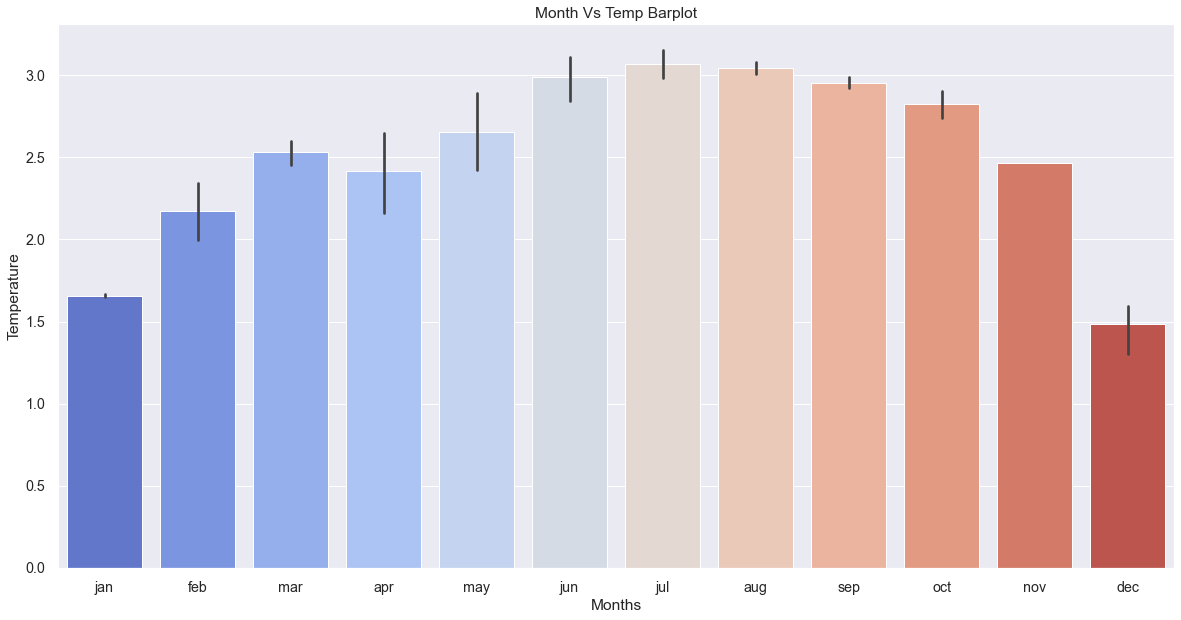

In [182]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

KeyError: 'X'

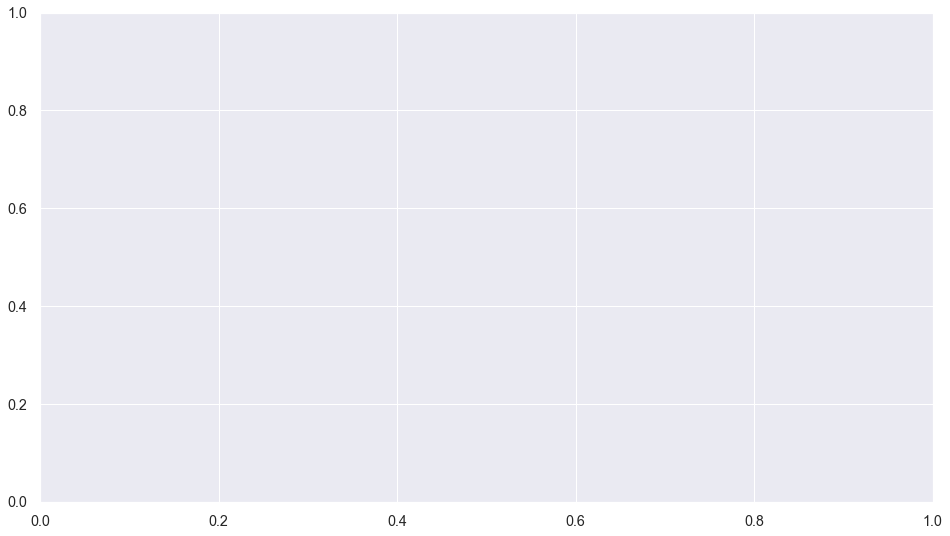

In [184]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
data.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*data['area'],figsize=(16,9))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

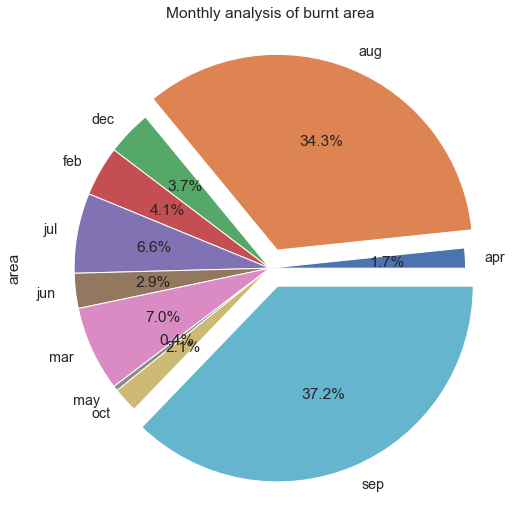

In [185]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=data[data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

In [241]:
# Visualize the Large Forest Fire Size rate by month
df1=data.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

% Small Forest Fire  % Large Forest Fire
January             100.000000             0.000000
February             70.000000            30.000000
March                79.245283            20.754717
April                77.777778            22.222222
May                  50.000000            50.000000
June                 81.250000            18.750000
July                 71.875000            28.125000
August               75.842697            24.157303
September            70.348837            29.651163
October              73.333333            26.666667
November            100.000000             0.000000
December             11.111111            88.888889

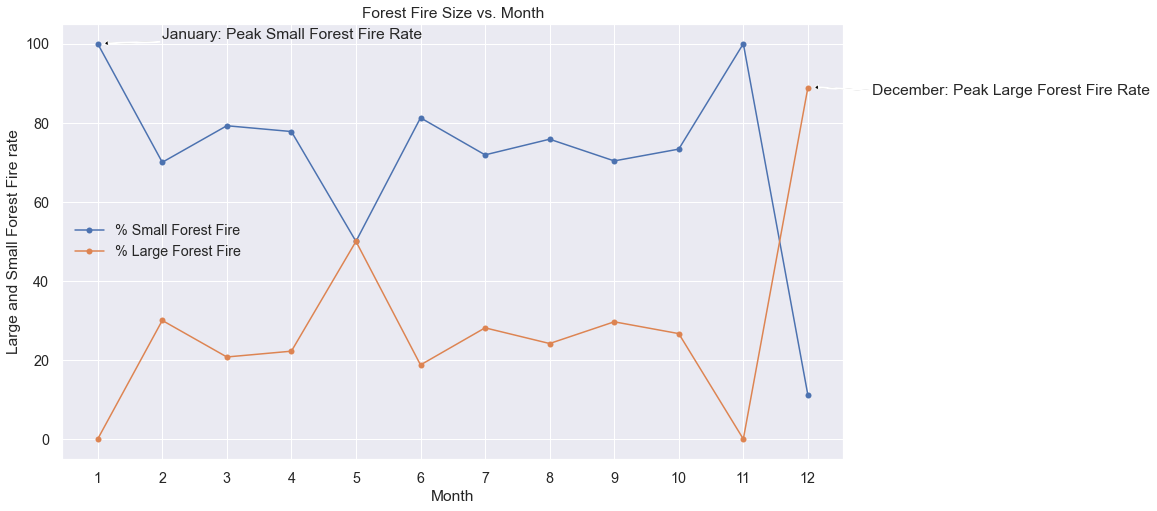

In [242]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=data.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [243]:
data_ = data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     month_nov  month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  \
0            0          0          0        1        0        0        0   
1            0          1          0        0        0        0        0   
2            0          1          0        0        0        1        0   
3            0          0          0        1        0        0        0   
4            0          0          0        0        0        0        1   
..         ...        ...        ...      ...      ...      ...      ...   
512          0          0          0        0        0        0        1   
513          0          0          0        0        0        0        1   
514          0          0          0        0        0        0        1   
515          0          0          0        0        0        1        0   
516          1          0          0        0        0        0        0   

     day_thu  day_tue  day_wed  
0          0        0        0  
1          0        1        0  
2          0        0        0  
3          0        0        0  
4          0        0        0  
..       ...      ...      ...  
512        0        0        0  
513        0        0        0  
514        0        0        0  
515        0        0        0  
516        0        1        0  

[509 rows x 46 columns]

Text(0.5, 1.0, 'Correlation with Forest Fire Size Category \n')

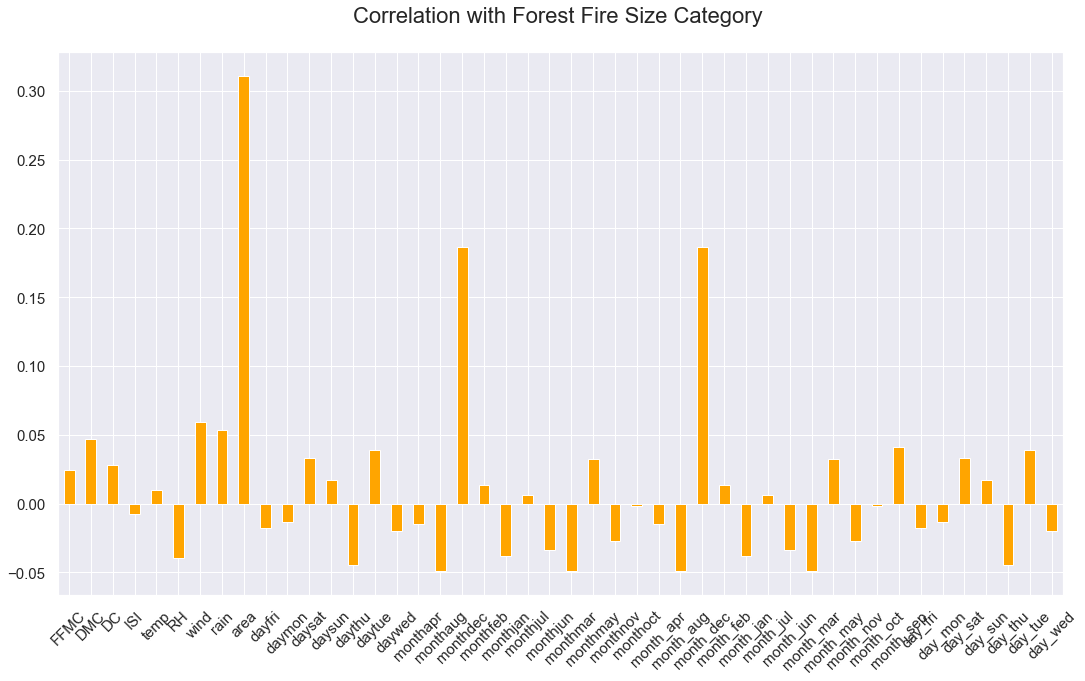

In [244]:
df=data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = data_.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [245]:
data.size_category.unique()

array(['small', 'large'], dtype=object)

# Feature Selection Technique

In [246]:
data.drop(['month','day','area'] ,axis=1, inplace= True)

In [247]:
data_ = data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_

FFMC    DMC     DC   ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0       1       0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0       0       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0       0       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2       1       0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0       0       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...     ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0       0       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0       0       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0       0       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0       0       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0       0       0  ...   

     monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0           0         0         0         0         0         0         1   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         1   
4           0         0         0         0         0         0         1   
..        ...       ...       ...       ...       ...       ...       ...   
512         1         0         0         0         0         0         0   
513         1         0         0         0         0         0         0   
514         1         0         0         0         0         0         0   
515         1         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthmay  monthnov  monthoct  
0           0         0         0  
1           0         0         1  
2           0         0         1  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         0         1         0  

[509 rows x 26 columns]

In [248]:
data_['size_category'] = df1.size_category
data_

FFMC    DMC     DC   ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0       1       0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0       0       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0       0       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2       1       0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0       0       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...     ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0       0       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0       0       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0       0       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0       0       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0       0       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  size_category  
0           0         0          small  
1           0         1          small  
2           0         1          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         1         0          small  

[509 rows x 27 columns]

In [249]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_

FFMC    DMC     DC   ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0       1       0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0       0       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0       0       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2       1       0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0       0       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...     ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0       0       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0       0       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0       0       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0       0       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0       0       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  size_category  
0           0         0              1  
1           0         1              1  
2           0         1              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         1         0              1  

[509 rows x 27 columns]

In [250]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

y=  data_.size_category

In [251]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [252]:
data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [253]:
data.isnull().any()

FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [254]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [255]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [256]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score   Feature
2   45.986882        DC
1   40.734806       DMC
17  17.381104  monthdec
7    6.237364      rain
5    4.852902        RH
6    1.454745      wind
22   1.083925  monthmar
12   0.900285    daythu
16   0.786364  monthaug
19   0.743935  monthjan
13   0.684611    daytue
21   0.566137  monthjun
23   0.530187  monthmay
10   0.472885    daysat
24   0.371968  monthnov
14   0.179034    daywed
8    0.137718    dayfri
11   0.123517    daysun
15   0.108893  monthapr
0    0.102097      FFMC
4    0.091429      temp
18   0.084413  monthfeb
9    0.077252    daymon
3    0.073243       ISI
20   0.016617  monthjul
25   0.001505  monthoct

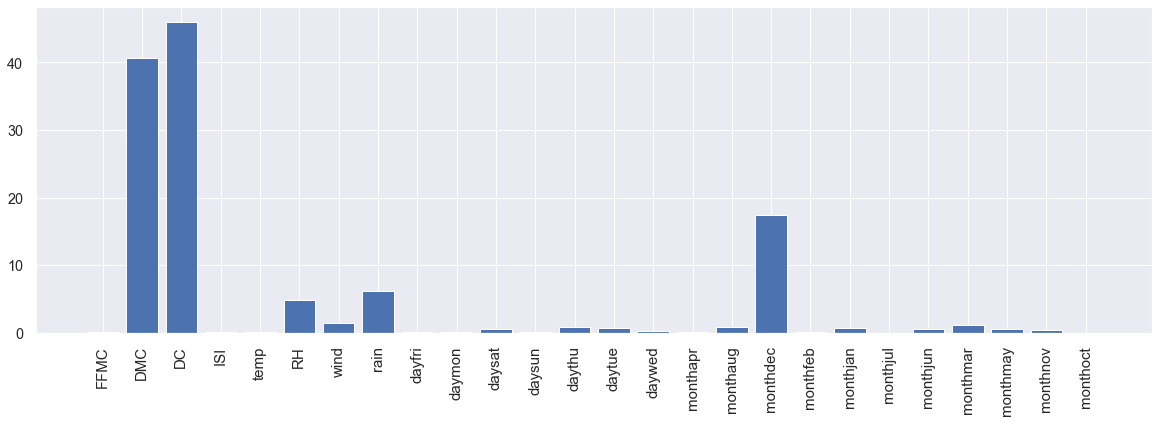

In [257]:
# [0,1,2,3,4,5,6,7,8]
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

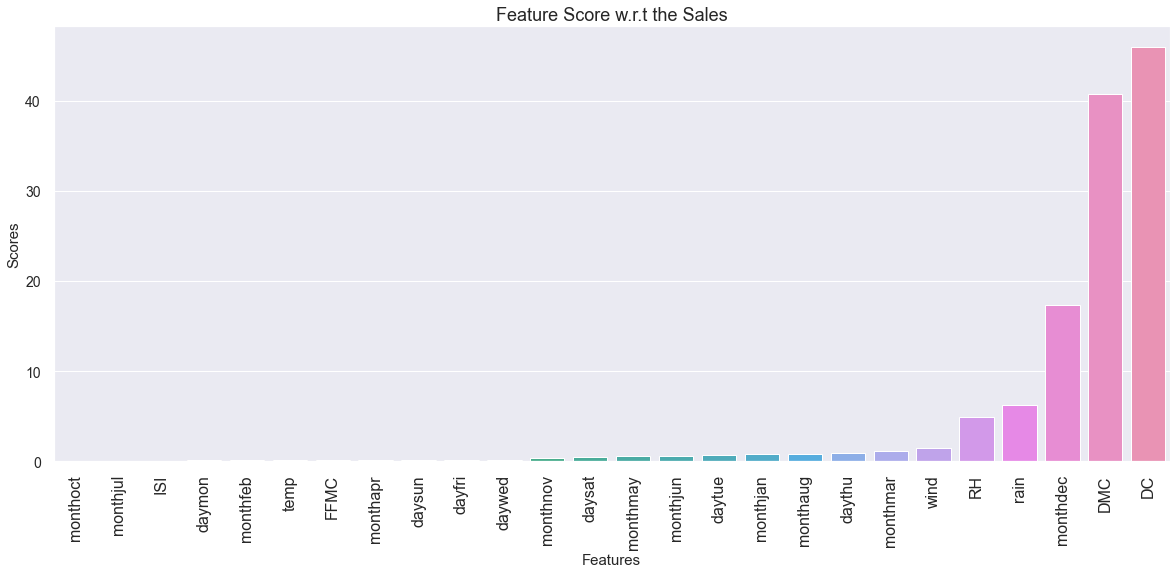

In [258]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()


In [262]:
model_data=df[['DMC','DC','RH','rain','wind','area','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan',
       'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep','size_category']]
model_data

DMC     DC  RH  rain  wind   area  monthapr  monthaug  monthdec  \
0     26.2   94.3  51   0.0   6.7   0.00         0         0         0   
1     35.4  669.1  33   0.0   0.9   0.00         0         0         0   
2     43.7  686.9  33   0.0   1.3   0.00         0         0         0   
3     33.3   77.5  97   0.2   4.0   0.00         0         0         0   
4     51.3  102.2  99   0.0   1.8   0.00         0         0         0   
..     ...    ...  ..   ...   ...    ...       ...       ...       ...   
512   56.7  665.6  32   0.0   2.7   6.44         0         1         0   
513   56.7  665.6  71   0.0   5.8  54.29         0         1         0   
514   56.7  665.6  70   0.0   6.7  11.16         0         1         0   
515  146.0  614.7  42   0.0   4.0   0.00         0         1         0   
516    3.0  106.7  31   0.0   4.5   0.00         0         0         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              0  
1           1         0              0  
2           1         0              0  
3           0         0              0  
4           0         0              0  
..        ...       ...            ...  
512         0         0              1  
513         0         0              1  
514         0         0              1  
515         0         0              0  
516         0         0              0  

[509 rows x 19 columns]

In [263]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [264]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

In [265]:
len(x_train.columns)

18

# Building Neural Networks Model

In [266]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.9101123809814453
batch_size: 5 - epochs: 10 Accuracy: 0.9438202381134033
batch_size: 5 - epochs: 50 Accuracy: 0.9859550595283508
batch_size: 5 - epochs: 100 Accuracy: 0.9915730357170105
batch_size: 10 - epochs: 5 Accuracy: 0.9213483333587646
batch_size: 10 - epochs: 10 Accuracy: 0.966292142868042
batch_size: 10 - epochs: 50 Accuracy: 0.9775280952453613
batch_size: 10 - epochs: 100 Accuracy: 0.966292142868042
batch_size: 15 - epochs: 5 Accuracy: 0.8651685118675232
batch_size: 15 - epochs: 10 Accuracy: 0.9747191071510315
batch_size: 15 - epochs: 50 Accuracy: 0.983146071434021
batch_size: 15 - epochs: 100 Accuracy: 0.9915730357170105
batch_size: 20 - epochs: 5 Accuracy: 0.7359550595283508
batch_size: 20 - epochs: 10 Accuracy: 0.9353932738304138
batch_size: 20 - epochs: 50 Accuracy: 0.9775280952453613
batch_size: 20 - epochs: 100 Accuracy: 0.9859550595283508


In [268]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 model.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
24/24 [==============================] - 6s 50ms/step - loss: 0.6660 - accuracy: 0.7479 - val_loss: 0.6570 - val_accuracy: 0.6864
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6312 - accuracy: 0.7479 - val_loss: 0.6368 - val_accuracy: 0.6864
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6044 - accuracy: 0.7479 - val_loss: 0.6227 - val_accuracy: 0.6864
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.5887 - accuracy: 0.7479 - val_loss: 0.6091 - val_accuracy: 0.7034
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5651 - accuracy: 0.7479 - val_loss: 0.5773 - val_accuracy: 0.7034
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.5320 - accuracy: 0.7899 - val_loss: 0.5334 - val_accuracy: 0.7712
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.4828 - accuracy: 0.8571 - val_loss: 0.5157 - val_accuracy: 0.7797
Epoch 8/10

24/24 [==============================] - 0s 9ms/step - loss: 0.1051 - accuracy: 0.9580 - val_loss: 0.0611 - val_accuracy: 0.9831
Epoch 59/100
24/24 [==============================] - 0s 9ms/step - loss: 0.1038 - accuracy: 0.9538 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 60/100
24/24 [==============================] - 0s 9ms/step - loss: 0.1126 - accuracy: 0.9748 - val_loss: 0.0538 - val_accuracy: 0.9831
Epoch 61/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0818 - accuracy: 0.9790 - val_loss: 0.0725 - val_accuracy: 0.9831
Epoch 62/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0977 - accuracy: 0.9538 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 63/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0931 - accuracy: 0.9706 - val_loss: 0.0589 - val_accuracy: 0.9831
Epoch 64/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0949 - accuracy: 0.9664 - val_loss: 0.1019 - val_accuracy: 0.9661
Epoch 65/100
24/2

In [269]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 5ms/step - loss: 0.0612 - accuracy: 0.9784
accuracy: 97.84%


In [270]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Check for overfitting and underfitting

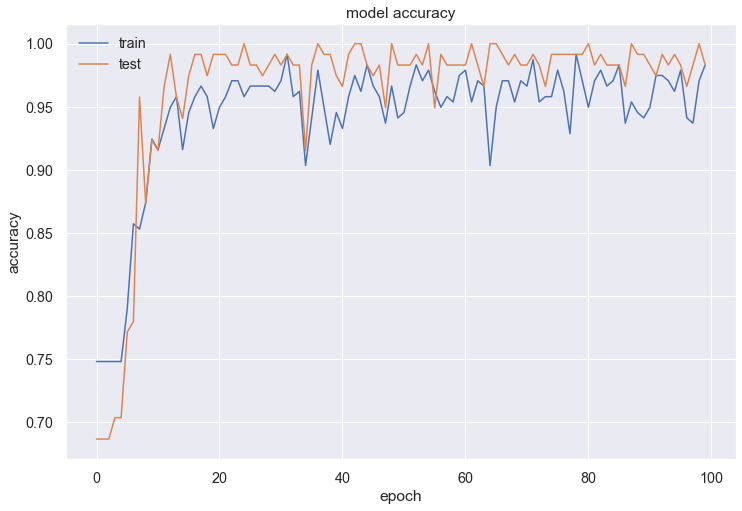

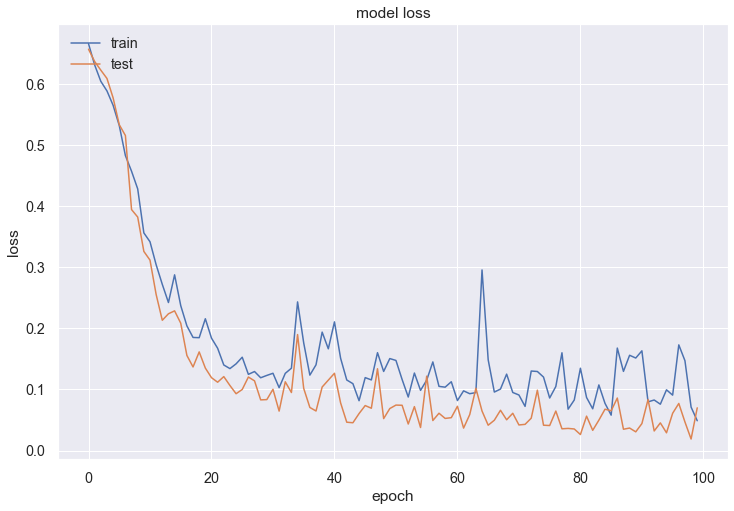

In [271]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()